# Part A: Conceptual Questions

## 1. What is a Decision Tree and how does it make decisions?
## A. decision tree(CART) is a non parametric and supervaised machine learning algorithm.it follows the procedure is if-then-else in the algortihm.it make the decision based by asking multiple question or condition and  recursively splitting the data into smaller parts and build a tree like structure.the tree follows top down greedy approach.The building of decision tree start from root node end at leaf nodes the nodes in between them is intermediate nodes.At every node checking the condition and split the nodes.It build tree by asking questions(conditions) on features on its range.split at every node give binary outcome only.


## 2.What does a split criterion mean in a Decision Tree?
## A. the decision tree split node based on some criteria .At every node it splits based on condition.In the condition comaparing feature with its respective range.features are selected based on calculating information gain.for classification,gini impurity is used for calculating error.for regression,mean squared error for calculating error.based on this which gives high information gain out of all that feature selected at that node .this process continue till leaf nodes.these leaf nodes gives final predictions

## 3. Difference between Gini Impurity and Entropy.
## A.gini impurity and entropy both are used for calculating error at every node in decision.there is difference in between them,entropy is used to calculating uncertainity in the data .wherer as gini impurity is used to measure how likley a random sample would be misclassified.when compared to gini impurity ,entropy calculation is quiet complex.In the decision gini impurity is recommened.gini impurity range from 0 to 0.5.where as entropy range from 0 to 1

## 4.Why do Decision Trees tend to overfit?
## A.whenever decision tree algorithm build decision tree to its maximum depth.the model tends to memorization. this memorization leads to overfitting.

## 5.What role does the max_depth parameter play?
## A. the max_depth parameter majorly help to improve performance of model .instead of model memorization it increase the generalization nature in the model.in this max_depth we gives some stricted depth values of tree because of this model was not learn patteren as depth possible as .so it help model to get rid from memorization and increase model perfromance

# Part B: Data Exploration

In [ ]:
# Load the dataset and display
import pandas as pd

In [ ]:
data=pd.read_csv("/content/heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
data.shape

(1025, 14)

In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# In this dataset: these are feature 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal'
## Target is column target

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# In this dataset all feature are in numeric datatype and those feature have appropriate datatype

In [ ]:
data.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


# there is no null values presented in the data

In [ ]:
data.duplicated().sum()

np.int64(723)

# the dataset contain 723 duplicate out of 1025. these are huge duplicates.i want to drop these duplicate continue my model building with reamining data

In [ ]:
data=data.drop_duplicates()

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.shape

(302, 14)

# After duplicate drop dataset shape is (302, 14)

# Part C: Data Preprocessing

In [ ]:
# dataset seggregration
x=data.drop("target",axis=1)
y=data["target"]
x.shape,y.shape

((302, 13), (302,))

In [ ]:
# Split the dataset
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2,stratify=y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((241, 13), (61, 13), (241,), (61,))

# Part D: Model Building

In [ ]:
# decision tree
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [ ]:
dt=DecisionTreeClassifier(criterion="gini",random_state=42)

In [ ]:
dt

DecisionTreeClassifier(random_state=42)

In [ ]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
dt.score(x_train,y_train)

1.0

In [ ]:
y_pred=dt.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1])

#  Part E: Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# accuracy score
accuracy_score(y_pred,y_test)

0.8032786885245902

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[22,  6],
       [ 6, 27]])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# classification report
report = classification_report(y_test, y_pred)

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        28
           1       0.82      0.82      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



## 1.Which class is predicted better?
## A. the class 1 is predicted better .the model predicted better for the person affected heart disease(class 1).

## 2.Is the model overfitting or underfitting?
## A. This model tends to overfitting



# Part F: Understanding Tree Depth (Manual Experiment)

In [ ]:
# max_depth : None
dt=DecisionTreeClassifier(criterion="gini",random_state=42)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
accuracy_score(y_pred,y_test),dt.score(x_train,y_train)

(0.8032786885245902, 1.0)

In [ ]:
# max_depth : 2
dt=DecisionTreeClassifier(criterion="gini",random_state=42,max_depth=2)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
accuracy_score(y_pred,y_test),dt.score(x_train,y_train)

(0.6557377049180327, 0.7842323651452282)

In [ ]:
# max_depth :5
dt=DecisionTreeClassifier(criterion="gini",random_state=42,max_depth=5)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
accuracy_score(y_pred,y_test),dt.score(x_train,y_train)

(0.7704918032786885, 0.941908713692946)

## 1.What happens when the tree is very shallow?
## A. the model accuracy decreases.it tends to underfitting.

## 2.What happens when the tree is very deep?
## A. the model tends to overfitting when the tree is very deep

## 3.Which model performs best and why?
## A. the model perform well when depth is 5 . i don't say it give better when compared to other it gives good.because the depth not too deep to not too shallow it gives a tree with medium level tree with 5 levels


# Part G: Tree Visualization

In [ ]:
import matplotlib.pyplot as plt


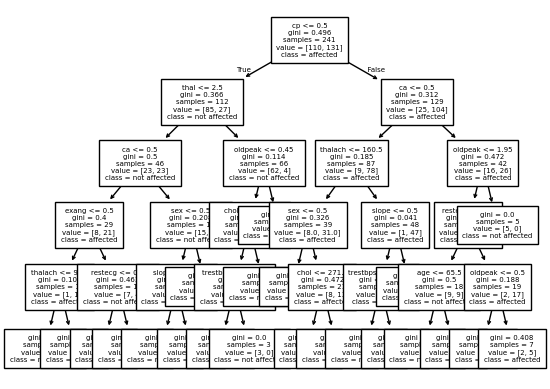

In [ ]:
plot_tree(dt,fontsize=5,feature_names=x.columns,class_names=["not affected","affected"])
plt.show()

# Part H: Reflection Questions

## 1.Why are Decision Trees suitable for medical datasets?
## A. Decision Trees are suitable for medical datasets because decision tree is highly interpretable and handling mixed datatype .because of interpretable medical expert easily identify which factors influence the target more .

## 2.What makes Decision Trees easy to interpret?
## A.decision tree are easy to interpret because they use transparent if else rules,visual tree structure and clear feature - based decision these are close to human thinking that why it is easily interpret

## 3.Why are Decision Trees commonly used in ensemble methods?
## A.Decision tree are commonly used in ensemble methods becasue it is simple,fast,flexible and its is unstable and overfitting algorithm when it combined with models it give best accuracy so it is used in ensemble methods

# Finally Check with these below parameter


In [ ]:
# Compare criterion='gini'
dt=DecisionTreeClassifier(criterion="gini",random_state=42)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
accuracy_score(y_pred,y_test),dt.score(x_train,y_train)

(0.8032786885245902, 1.0)

In [ ]:
# criterion='entropy'
dt=DecisionTreeClassifier(criterion="entropy",random_state=42)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
accuracy_score(y_pred,y_test),dt.score(x_train,y_train)

(0.7213114754098361, 1.0)

# when compared to gini impurity the entropy build low accuracy model.

In [ ]:
# Try min_samples_leaf manually
# min_samples_leaf=2
dt=DecisionTreeClassifier(criterion="gini",random_state=42,min_samples_leaf=2)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
accuracy_score(y_pred,y_test),dt.score(x_train,y_train)

(0.7213114754098361, 0.9585062240663901)

In [ ]:
# min_samples_leaf=3
dt=DecisionTreeClassifier(criterion="gini",random_state=42,min_samples_leaf=3)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
accuracy_score(y_pred,y_test),dt.score(x_train,y_train)

(0.7213114754098361, 0.9377593360995851)

In [ ]:
# min_samples_leaf=5
dt=DecisionTreeClassifier(criterion="gini",random_state=42,min_samples_leaf=5)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
accuracy_score(y_pred,y_test),dt.score(x_train,y_train)

(0.7868852459016393, 0.91701244813278)

In [ ]:
# min_samples_leaf=7
dt=DecisionTreeClassifier(criterion="gini",random_state=42,min_samples_leaf=7)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
accuracy_score(y_pred,y_test),dt.score(x_train,y_train)

(0.7868852459016393, 0.8962655601659751)

# From my observations when min_sample_leaf values increase model increase its accuracy.